In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## EDA

In [4]:
quantitative = [f for f in train_df.columns if train_df.dtypes[f] != 'object']
quantitative.remove('Id')
qualitative = [f for f in train_df.columns if train_df.dtypes[f] == 'object']

print("Quantitative Variables: \t\n{}".format(quantitative))
print("\n")
print("Qualitative Variables: \t\n{}".format(qualitative))

Quantitative Variables: 	
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Qualitative Variables: 	
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'Fi

In [5]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


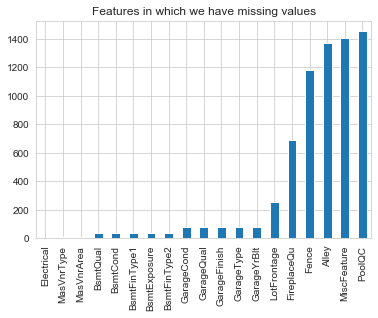

In [7]:
sns.set_style("whitegrid")
missing = train_df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
plt.figure();plt.title('Features in which we have missing values')
missing.plot.bar()

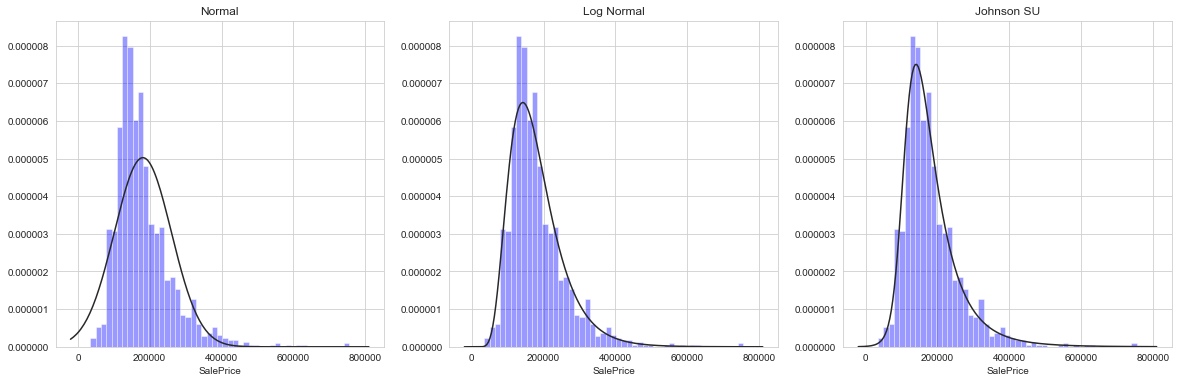

In [8]:
#Fitting distributions to the features SalePrice


fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(20,6))
axis1.title.set_text('Normal')
axis2.title.set_text('Log Normal')
axis3.title.set_text('Johnson SU')

sns.distplot(train_df['SalePrice'], kde=False, color='blue', ax=axis1, fit=stats.norm)
sns.distplot(train_df['SalePrice'] , kde=False, color='blue', ax=axis2, fit=stats.lognorm)
sns.distplot(train_df['SalePrice'], kde=False, color='blue', ax=axis3, fit=stats.johnsonsu)


plt.show()

##### As we can see, the distribution of the Sale Prices is skewed to the right. This is also a expected behavior for this variable, as few people are able to afford very expensive houses (not only in Ames, but almost everywhere). It`s also clear that the prices don't follow a normal distribution, so we need to transform it before running any linear regression.

In [9]:
#Testing the normality of quantitative features

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(train_df[quantitative])
normal = normal.apply(test_normality)
print(not normal.any())

False


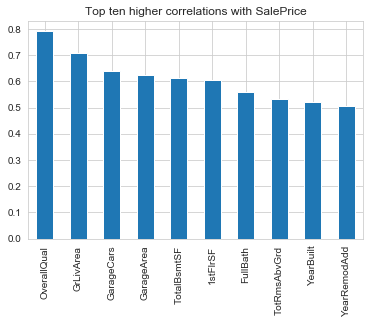

In [10]:
# Correlation Matrix

corr = train_df[quantitative].corr()

#plotting the top 10 correlated features

SalePrice_corr=corr['SalePrice'].sort_values(ascending=False)
plt.figure();plt.title('Top ten higher correlations with SalePrice')
SalePrice_corr[1:11].plot.bar()

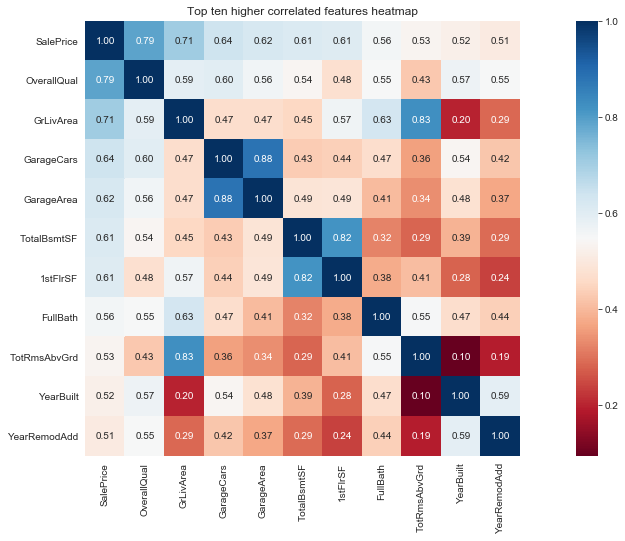

In [11]:
# Heatmap of the Correlation of SalePrice and the top ten correlated features

top_ten_corr_labels=SalePrice_corr[0:11].keys()
top_ten_corr = train_df[top_ten_corr_labels].corr()

plt.figure(figsize=(20,8));plt.title('Top ten higher correlated features heatmap')
sns.heatmap(data=top_ten_corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True)

##### As shown on the bar graph above, there are some features that are strongly correlated to SalePrice

##### And the heatmap just below the top ten correlated features to sales price show us the correlations between these features, and it is not difficult to see that multicolinearity is also an issue here, as for example:

##### GarageArea x GarageCars - correlation: 0.88
##### TotRmsAbvGrd x GrLivArea - correlation: 0.83
##### 1stFlrSF x TotalBsmtSF - correlation: 0.82
##### FullBath x GrLivArea - correlation: 0.63
##### YearRemodAdd x YearBuilt - correlation: 0.59

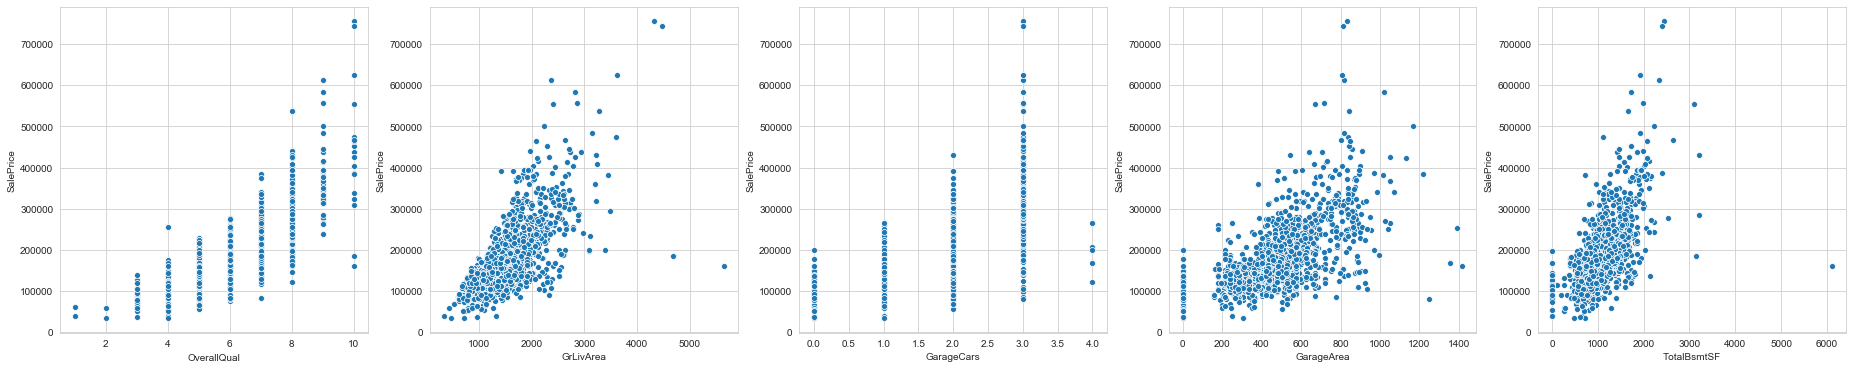

In [12]:
# Scatterplots
fig, (axis1, axis2, axis3, axis4, axis5) = plt.subplots(1,5, figsize=(32,6))
sns.scatterplot(x='OverallQual',y='SalePrice',data=train_df, ax=axis1)
sns.scatterplot(x='GrLivArea',y='SalePrice',data=train_df, ax=axis2)
sns.scatterplot(x='GarageCars',y='SalePrice',data=train_df, ax=axis3)
sns.scatterplot(x='GarageArea',y='SalePrice',data=train_df, ax=axis4)
sns.scatterplot(x='TotalBsmtSF',y='SalePrice',data=train_df, ax=axis5)

## Preprocessing Data

In [13]:
from sklearn import preprocessing

In [14]:
# Creating a copy of the datasets
preprocessing_train_df = train_df.copy()
preprocessing_test_df = test_df.copy()

# Saving datasets indexes
train_idx = train_df.shape[0]
test_idx = test_df.shape[0]

#Saving HouseID for Kaggle submission template
houseId = test_df['Id']

In [15]:
# Drop Id
preprocessing_train_df.drop(['Id'], axis=1, inplace=True)
preprocessing_test_df.drop(['Id'], axis=1, inplace=True)

# Drop the two outliers houses (#523 and #1298)
preprocessing_train_df = preprocessing_train_df[preprocessing_train_df.GrLivArea < 4500]
preprocessing_train_df.reset_index(drop=True, inplace=True)

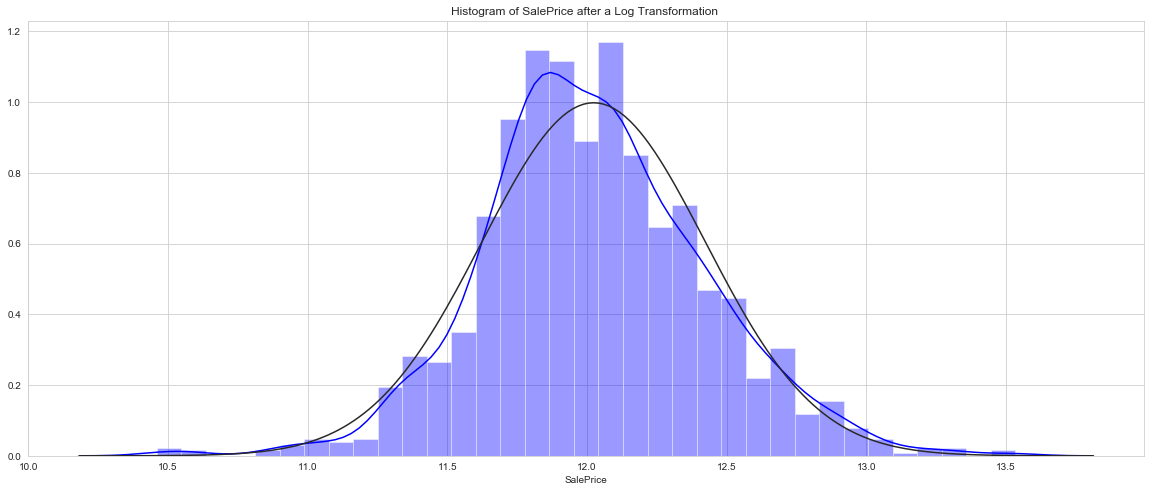

In [16]:
#Transforming target variable SalePrice
preprocessing_train_df['SalePrice'] = np.log1p(preprocessing_train_df['SalePrice'])

plt.figure(figsize=(20,8));plt.title('Histogram of SalePrice after a Log Transformation ')
sns.distplot(preprocessing_train_df['SalePrice'], color='blue', fit=stats.norm, norm_hist=True)
plt.show()

In [17]:
# Removing 'SalePrice' column from train dataset before merging all the data
target = preprocessing_train_df.SalePrice.copy()
preprocessing_train_df.drop(['SalePrice'], axis=1, inplace=True)

# Merging both datasets into a single one

Merged_df = pd.concat(objs=[preprocessing_train_df, preprocessing_test_df], axis=0).reset_index(drop=True)

In [18]:
# Creating another checkpoint

preprocessing_Merged_df = Merged_df.copy()

# Checking the dimensions of the Dataset

print("Merged Dataset \n Variables:\t{}\n Inputs:\t{}".format(Merged_df.shape[1], Merged_df.shape[0]))

Merged Dataset 
 Variables:	79
 Inputs:	2917


##### I have merged both train and test data sets into a single one called Merged_df in order to perform all the preprocessing steps at once in all the data.  

In [19]:
# Table of Missing Values for the Merged Dataframe

Total_Missing=Merged_df.isnull().sum().sort_values(ascending = False)[Merged_df.isnull().sum().sort_values(ascending = False) != 0]
Percent_Missing=round(Merged_df.isnull().sum().sort_values(ascending = False)/len(Merged_df)*100,2)[round(Merged_df.isnull().sum().sort_values(ascending = False)/len(Merged_df)*100,2) != 0]
Merged_Missing = pd.concat([Total_Missing,Percent_Missing], axis=1, keys=['Total','%'])
Merged_Missing

,Total,%
PoolQC,2908,99.69
MiscFeature,2812,96.40
Alley,2719,93.21
Fence,2346,80.43
FireplaceQu,1420,48.68
LotFrontage,486,16.66
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


In [20]:
# Replacing blank spaces with 'None'
none_replace = ["PoolQC","MiscFeature","Alley","Fence","FireplaceQu","GarageCond","GarageQual","GarageFinish","GarageType","BsmtCond","BsmtExposure","BsmtQual","BsmtFinType2","BsmtFinType1","BsmtFinSF1","BsmtFinSF2"]

for i in none_replace:
  preprocessing_Merged_df[i] = preprocessing_Merged_df[i].fillna('None')

In [21]:
# Replacing blank spaces with '0'
zero_replace = ["GarageYrBlt","MasVnrArea","BsmtHalfBath","BsmtFullBath","BsmtUnfSF","TotalBsmtSF","GarageArea","GarageCars"]

for i in zero_replace:
  preprocessing_Merged_df[i] = preprocessing_Merged_df[i].fillna(0)

In [22]:
# Replacing blank spaces with the mode

preprocessing_Merged_df['MasVnrType'] = preprocessing_Merged_df['MasVnrType'].fillna(preprocessing_Merged_df['MasVnrType'].mode()[0])
preprocessing_Merged_df['Utilities'] = preprocessing_Merged_df['Utilities'].fillna(preprocessing_Merged_df['Utilities'].mode()[0])
preprocessing_Merged_df['Exterior2nd'] = preprocessing_Merged_df['Exterior2nd'].fillna(preprocessing_Merged_df['Exterior2nd'].mode()[0])
preprocessing_Merged_df['Exterior1st'] = preprocessing_Merged_df['Exterior1st'].fillna(preprocessing_Merged_df['Exterior1st'].mode()[0])
preprocessing_Merged_df['SaleType'] = preprocessing_Merged_df['SaleType'].fillna(preprocessing_Merged_df['SaleType'].mode()[0])

# Replacing blank spaces with general / typical categories

preprocessing_Merged_df['Functional'] = preprocessing_Merged_df['Functional'].fillna("Typ")
preprocessing_Merged_df['Electrical'] = preprocessing_Merged_df['Electrical'].fillna("SBrkr")
preprocessing_Merged_df['KitchenQual'] = preprocessing_Merged_df['KitchenQual'].fillna("TA")

In [23]:
# Replacing LotFrontage missing values
preprocessing_Merged_df['LotFrontage'] = preprocessing_Merged_df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

# Replacing MSZoning missing values
preprocessing_Merged_df['MSZoning'] = preprocessing_Merged_df.groupby('Neighborhood')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

In [24]:
# Table of Missing Values for the Merged Dataframe

Total_Missing=preprocessing_Merged_df.isnull().sum().sort_values(ascending = False)[preprocessing_Merged_df.isnull().sum().sort_values(ascending = False) != 0]
Percent_Missing=round(preprocessing_Merged_df.isnull().sum().sort_values(ascending = False)/len(preprocessing_Merged_df)*100,2)[round(preprocessing_Merged_df.isnull().sum().sort_values(ascending = False)/len(preprocessing_Merged_df)*100,2) != 0]
Merged_Missing = pd.concat([Total_Missing,Percent_Missing], axis=1, keys=['Total','%'])
Merged_Missing

,Total,%


In [25]:
# Removing Sale Price from the list of features to be analyzed, as we already done some work on it
quantitative.remove('SalePrice')

In [26]:
# Getting the skewness of the quantitative features
skewness_features = preprocessing_Merged_df[quantitative].skew().sort_values()

In [27]:
# Features with absolute Skweness > 0.5
skewed_features = skewness_features[abs(skewness_features) > 0.5]
skewed_features = skewed_features.index

#Box Cox Transformation
for i in skewed_features:
  preprocessing_Merged_df[i] = boxcox1p(preprocessing_Merged_df[i], boxcox_normmax(preprocessing_Merged_df[i]+1))

C:\Users\zhrht\anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
C:\Users\zhrht\anaconda3\lib\site-packages\scipy\stats\stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


## Feature Engineering

In [28]:
# Checking the dimensions of the Dataframe
print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(preprocessing_Merged_df.shape[1], preprocessing_Merged_df.shape[0]))

Train Dataset 
 Variables:	79
 Inputs:	2917


In [29]:
# Total House Area
preprocessing_Merged_df['TotalHouseArea'] =  (preprocessing_Merged_df['1stFlrSF'] + preprocessing_Merged_df['2ndFlrSF'] + preprocessing_Merged_df['GrLivArea'] +
                                              preprocessing_Merged_df['TotalBsmtSF'] - preprocessing_Merged_df['LowQualFinSF'] - preprocessing_Merged_df['BsmtUnfSF'])

In [30]:
# Total Bathrooms
preprocessing_Merged_df['TotalBathrooms'] = (preprocessing_Merged_df['BsmtFullBath'] + (0.5 * preprocessing_Merged_df['BsmtHalfBath']) + preprocessing_Merged_df['FullBath'] + ( 0.5 * preprocessing_Merged_df['HalfBath']))

In [31]:
# Total Porch Area
preprocessing_Merged_df['TotalPorchArea'] =  (preprocessing_Merged_df['OpenPorchSF'] + preprocessing_Merged_df['EnclosedPorch'] + preprocessing_Merged_df['3SsnPorch'] + preprocessing_Merged_df['ScreenPorch'])

In [32]:
# Swimming Pool

preprocessing_Merged_df['SwimmingPool'] = preprocessing_Merged_df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

In [33]:
# Year Built Plus Remold
min_max_scaler = preprocessing.MinMaxScaler()

scaled_YearBuilt = preprocessing_Merged_df[['YearBuilt']].values.astype(float)
scaled_YearRemodAdd = preprocessing_Merged_df[['YearRemodAdd']].values.astype(float)

scaled_YearBuilt = min_max_scaler.fit_transform(scaled_YearBuilt)
scaled_YearRemodAdd = min_max_scaler.fit_transform(scaled_YearRemodAdd)

preprocessing_Merged_df['YearBuiltPlusRemold'] = (scaled_YearBuilt + scaled_YearRemodAdd)

In [34]:
# Basement

preprocessing_Merged_df['Basement'] = preprocessing_Merged_df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

In [35]:
# Dropping the features we used to build our new features

preprocessing_Merged_df = preprocessing_Merged_df.drop(['1stFlrSF', '2ndFlrSF', 'GrLivArea', 'TotalBsmtSF', 'LowQualFinSF', 'BsmtUnfSF',
                                                        'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                                                        'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch',
                                                        'PoolArea','PoolQC','YearBuilt','YearRemodAdd',
                                                        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2'], axis=1)

In [36]:
# Dropping GarageArea
preprocessing_Merged_df = preprocessing_Merged_df.drop(['GarageArea'], axis=1)

In [37]:
# Dropping MoSold
preprocessing_Merged_df = preprocessing_Merged_df.drop(['MoSold','Street'], axis=1)

In [39]:
dummies_preprocessing_Merged_df = preprocessing_Merged_df.copy()

In [40]:
# Creating Dummy Variables

dummies_preprocessing_Merged_df = pd.get_dummies(preprocessing_Merged_df, drop_first=True).reset_index(drop=True)

In [41]:
dummies_preprocessing_Merged_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,6.499672,18.780783,13.833054,7,3.991517,19.433176,3,0.750957,2.261968,0.000000,...,0,0,0,0,1,0,0,0,1,0
1,4.249693,21.443059,14.117918,6,6.000033,0.000000,3,0.750957,1.996577,0.903334,...,0,0,0,0,1,0,0,0,1,0
2,6.499672,19.331291,14.476512,7,3.991517,17.768841,3,0.750957,1.996577,0.903334,...,0,0,0,0,1,0,0,0,1,0
3,6.862540,17.840335,14.106197,7,3.991517,0.000000,3,0.750957,2.137369,0.903334,...,0,0,0,0,1,0,0,0,0,0
4,6.499672,22.118469,15.022008,8,3.991517,25.404165,4,0.750957,2.373753,0.903334,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,9.030083,8.936631,10.765922,4,5.348041,0.000000,3,0.750957,1.834659,0.000000,...,0,0,0,0,1,0,0,0,1,0
2913,9.030083,8.936631,10.723223,4,3.991517,0.000000,3,0.750957,1.996577,0.000000,...,0,0,0,0,1,0,0,0,0,0
2914,4.249693,33.173868,15.820339,5,5.348041,0.000000,4,0.750957,2.137369,0.903334,...,0,0,0,0,1,0,0,0,0,0
2915,7.337374,18.220106,14.307159,5,3.991517,0.000000,3,0.750957,1.996577,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [42]:
# Normalizing GarageYearBlt Values
scaled_GarageYearBlt = dummies_preprocessing_Merged_df[['GarageYrBlt']].values.astype(float)
scaled_GarageYearBlt = min_max_scaler.fit_transform(scaled_GarageYearBlt)
dummies_preprocessing_Merged_df['GarageYrBlt'] = scaled_GarageYearBlt

In [43]:
# Splitting the datasets using the indexes we saved

preprocessed_train_df = dummies_preprocessing_Merged_df.iloc[:(train_idx-2)]
preprocessed_test_df = dummies_preprocessing_Merged_df.iloc[(train_idx-2):]

In [44]:
# Checking the dimensions of the Datasets

print("Train Dataset \n Variables:\t{}\n Inputs:\t{}".format(preprocessed_train_df.shape[1], preprocessed_train_df.shape[0]))
print("\n")
print("Test Dataset \n Variables:\t{}\n Inputs:\t{}".format(preprocessed_test_df.shape[1], preprocessed_test_df.shape[0]))

Train Dataset 
 Variables:	215
 Inputs:	1458


Test Dataset 
 Variables:	215
 Inputs:	1459


## Modeling

In [46]:
class Stats:
    
    def __init__(self, X, y, y_hat):
        self.data = X
        self.target = y
        self.predicted = y_hat
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        #returns sum of squared errors (model vs actual)
        squared_errors = (self.target - self.predicted) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        #returns total sum of squared errors (actual vs avg(actual))
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        #returns calculated value of r^2
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        #returns calculated value of adjusted r^2
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [47]:
def report_stats(stats_obj):
    #returns report of statistics for the model predicted values
    print("Key Four Statistics for this Model \n")
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_log_error

In [50]:
#Splitting our train test into two: train e test sets

X_train, X_test, y_train, y_test = train_test_split(
    preprocessed_train_df, target, test_size=0.1)

#### Ridge Regression

In [51]:
import decimal
def drange(x, y, jump):
  while x < y:
    yield float(x)
    x += decimal.Decimal(jump)

alpha_ridge = list(drange(0, 100, '0.1'))

# Create variables to store SSE and MSE for all the alpha values
alpha_ridge_rss = {}
alpha_ridge_mse = {}

# Regressions for all the values of alpha
for i in alpha_ridge:
    ## Assigin each model. 
    ridge = Ridge(alpha= i, normalize=True)
    ## fit the model. 
    ridge.fit(X_train, y_train)
    ## Predicting the target value
    y_hat_ridge = ridge.predict(X_test)

    mse = mean_squared_error(y_test, y_hat_ridge)
    rss = sum((y_hat_ridge-y_test)**2)
    alpha_ridge_mse[i] = mse
    alpha_ridge_rss[i] = rss

In [52]:
# Finding out the best alpha for our model
min_mse_ridge = min(alpha_ridge_mse.items(), key=lambda x: x[1])
min_rss_ridge = min(alpha_ridge_rss.items(), key=lambda x: x[1])

print("Alpha with the minimum MSE , minimun MSE:\t {}\n".format(min_mse_ridge))
print("Alpha with the minimum RSS , minimun RSS:\t {}\n".format(min_rss_ridge))

Alpha with the minimum MSE , minimun MSE:	 (0.1, 0.01525623131242704)

Alpha with the minimum RSS , minimun RSS:	 (0.1, 2.227409771614347)



##### We can see here that alpha = 0.1 is the best option for our regression model.

In [53]:
#Running again the rigde regression only with the best alpha value
best_alpha_ridge = 0.1
ridge = Ridge(alpha= best_alpha_ridge, normalize=True)
ridge.fit(X_train, y_train)
y_hat_ridge = ridge.predict(X_test)

# Four Key Statistics for the Multiple Linear Regression
stats_linear_ridge = Stats(X_test,y_test,y_hat_ridge)
report_stats(stats_linear_ridge)

Key Four Statistics for this Model 

sse:     2.2274
sst:     22.2117
r^2:     0.8997
adj_r^2: 1.2077


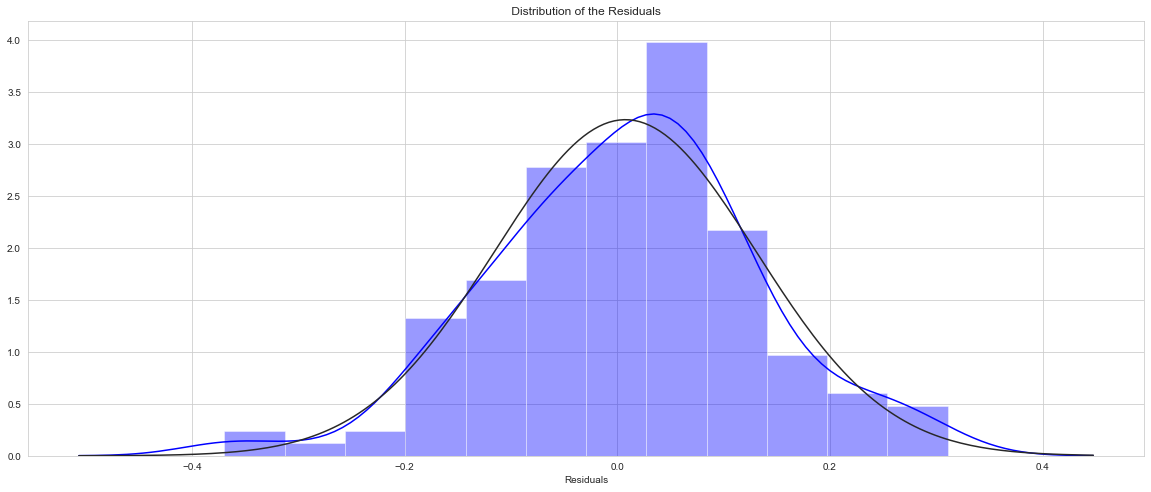

In [54]:
# Residuals
ridge_residuals = y_test - y_hat_ridge

plt.figure(figsize=(20,8));plt.title(' Distribution of the Residuals ')
sns.distplot(ridge_residuals, color='blue', fit=stats.norm, norm_hist=True, axlabel='Residuals')
plt.show()

In [56]:
#Root mean squared error
rmse_ridge = np.sqrt(mean_squared_log_error( y_test, y_hat_ridge ))

print("Root-Mean-Squared-Error (RMSE):\t {}\n".format(rmse_ridge))

Root-Mean-Squared-Error (RMSE):	 0.009580025522862924



##  Evaluating

In [57]:
y_predicted = ridge.predict(preprocessed_test_df)

submission_df = pd.DataFrame ({"Id": houseId,"SalePrice": y_predicted})

submission_df.to_csv('./submission_houseprices.csv', index=False)